# Simple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\rauna\Downloads\Complete-Data-Science-With-Machine-Learning-And-NLP-2024-main\3-Complete Linear Regression\Practicals\height-weight.csv")

In [4]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


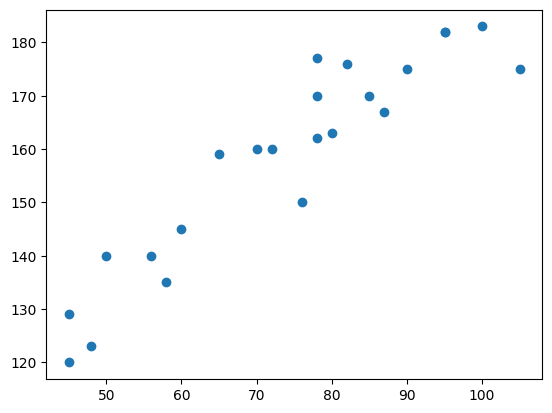

In [5]:
plt.scatter(x="Weight", y="Height", data=df)

In [6]:
weight_mean = df["Weight"].mean()

In [7]:
weight_mean

np.float64(73.82608695652173)

In [8]:
height_mean = df["Height"].mean()

In [9]:
height_mean

np.float64(158.3913043478261)

In [10]:
x = (df["Weight"] - weight_mean)

In [11]:
x

0    -28.826087
1    -15.826087
2    -25.826087
3    -13.826087
4     -3.826087
5      4.173913
6      6.173913
7     16.173913
8     21.173913
9      4.173913
10     8.173913
11    21.173913
12    31.173913
13    26.173913
14    11.173913
15     4.173913
16   -23.826087
17    -8.826087
18     2.173913
19    13.173913
20   -28.826087
21   -17.826087
22    -1.826087
Name: Weight, dtype: float64

In [12]:
x2 = (df["Weight"] - weight_mean)**2
x2

0     830.943289
1     250.465028
2     666.986767
3     191.160681
4      14.638941
5      17.421550
6      38.117202
7     261.595463
8     448.334594
9      17.421550
10     66.812854
11    448.334594
12    971.812854
13    685.073724
14    124.856333
15     17.421550
16    567.682420
17     77.899811
18      4.725898
19    173.551985
20    830.943289
21    317.769376
22      3.334594
Name: Weight, dtype: float64

In [13]:
y = (df["Height"] - height_mean)

In [14]:
y

0    -38.391304
1    -23.391304
2    -35.391304
3    -13.391304
4      1.608696
5      3.608696
6      4.608696
7     16.608696
8     23.608696
9     11.608696
10    17.608696
11    23.608696
12    16.608696
13    24.608696
14    11.608696
15    18.608696
16   -18.391304
17     0.608696
18    -8.391304
19     8.608696
20   -29.391304
21   -18.391304
22     1.608696
Name: Height, dtype: float64

In [15]:
b1 = np.sum(x*y)/np.sum(x2)
b1

np.float64(1.01654416314005)

In [16]:
b0 = height_mean - b1*weight_mean
b0

np.float64(83.34382656470414)

In [17]:
#y_p  = 83.3438 + 1.01*x 

# Using sklearn

In [18]:
x = df[["Weight"]]    # independent feature should be in dataframe or in 2d  (check x.shape)
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [19]:
x.shape

(23, 1)

In [20]:
y = df["Height"]           # independent doesnt required to be in 2d
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 42)

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [23]:
x_train = scalar.fit_transform(x_train)

In [24]:
x_test = scalar.transform(x_test)

for training we use fit_transform and for testing we use transform because using fit transform in test causes data leak which is what we dont want while test a data

In [25]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [26]:
regression.fit(x_train,y_train)

LinearRegression()

In [27]:
regression.coef_

array([17.2982057])

In [28]:
regression.intercept_

np.float64(156.47058823529412)

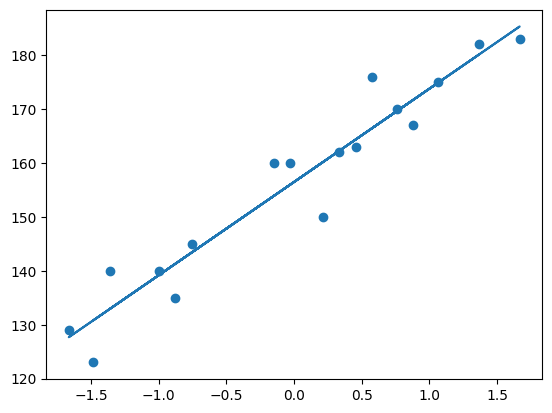

In [29]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

In [30]:
y_pred = regression.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

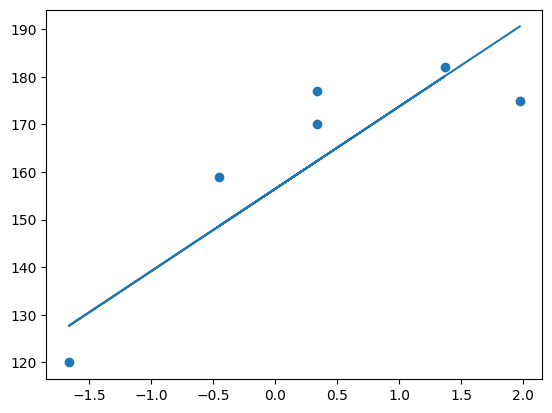

In [31]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regression.predict(x_test))

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [34]:
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"root_mean_squared_error = {rmse}")
print(f"r2_score = {r2}")

mean_squared_error = 114.84069295228699
mean_absolute_error = 9.66512588679501
root_mean_squared_error = 10.716374991212605
r2_score = 0.7360826717981276


In [35]:
import statsmodels.api as sm

In [36]:
model = sm.OLS(y_train,x_train).fit()

In [37]:
prediction = model.predict(x_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 16 May 2025   Prob (F-statistic):                       0.664
Time:                        14:00:14   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\rauna\codes\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [39]:
model2 = sm.OLS(df["Height"],df["Weight"]).fit()

In [40]:
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1320.
Date:                Fri, 16 May 2025   Prob (F-statistic):                    3.88e-21
Time:                        14:00:15   Log-Likelihood:                         -102.02
No. Observations:                  23   AIC:                                      206.0
Df Residuals:                      22   BIC:                                      207.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Multiple linear regression

In [41]:
df = pd.read_csv(r"C:\Users\rauna\Downloads\Complete-Data-Science-With-Machine-Learning-And-NLP-2024-main\3-Complete Linear Regression\Practicals\economic_index.csv")

In [42]:
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [43]:
df = df.drop(columns=["Unnamed: 0","year","month"])

In [44]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


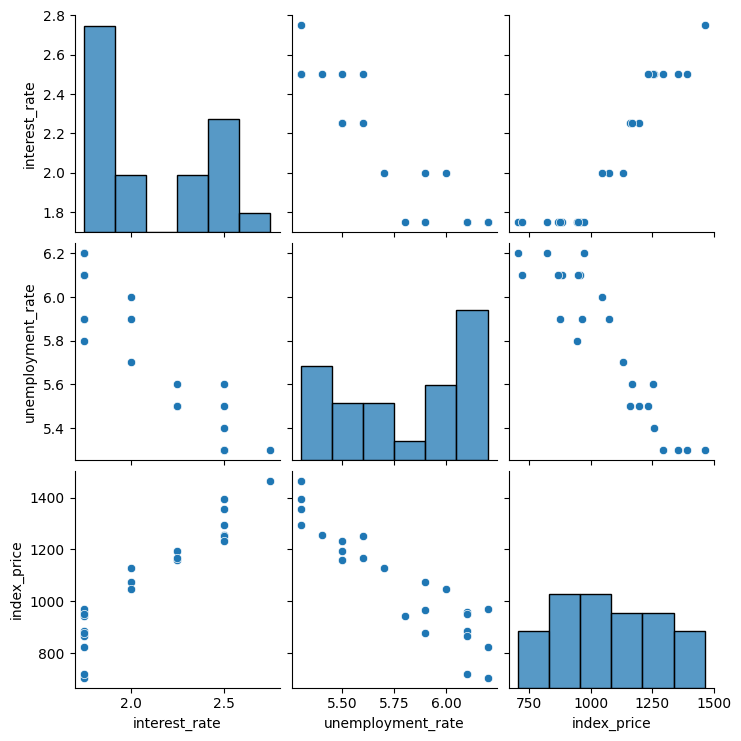

In [45]:
sns.pairplot(df)

In [46]:
x = df[["interest_rate","unemployment_rate"]]

In [47]:
x

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [48]:
y = df["index_price"]

In [49]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

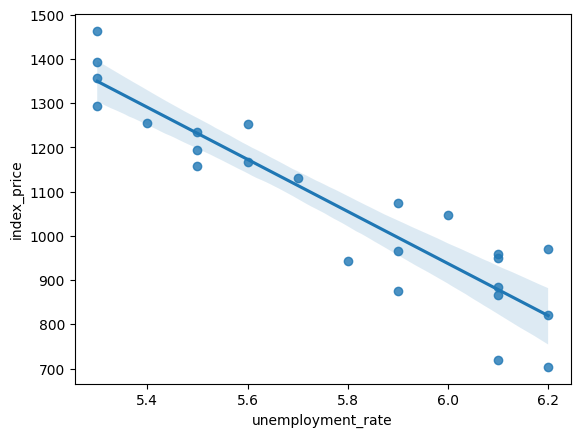

In [50]:
sns.regplot(x="unemployment_rate", y = "index_price", data= df)

<Axes: xlabel='interest_rate', ylabel='index_price'>

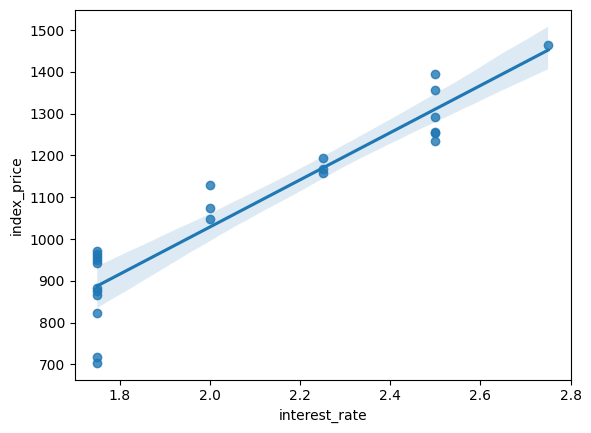

In [51]:
sns.regplot(x="interest_rate", y = "index_price", data= df)

In [52]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [53]:
x_train = scalar.fit_transform(x_train)
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [54]:
x_test = scalar.transform(x_test)
x_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [55]:
regression.fit(x_train,y_train)

LinearRegression()

In [56]:
regression.intercept_

np.float64(1053.4444444444443)

In [57]:
regression.coef_

array([  88.27275507, -116.25716066])

In [58]:
y_pred = regression.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [59]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(regression, x_train,  y_train, scoring="neg_mean_squared_error", verbose=1, cv=3)

In [60]:
np.mean(cv)

np.float64(-5914.828180162386)

In [61]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [62]:
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"root_mean_squared_error = {rmse}")
print(f"r2_score = {r2}")

mean_squared_error = 5793.762887712569
mean_absolute_error = 59.935781523235484
root_mean_squared_error = 76.11677139574805
r2_score = 0.8278978091457145


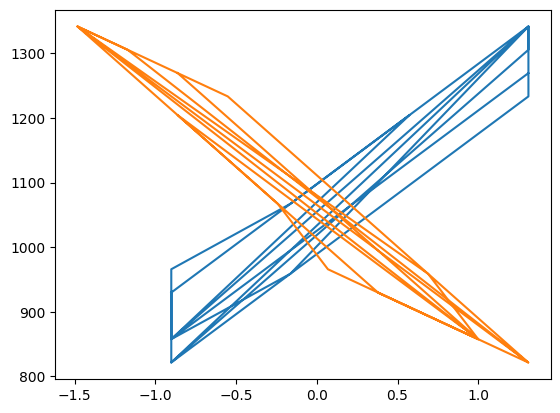

In [63]:
plt.plot(x_train,regression.predict(x_train))


In [64]:
residuals = y_pred - y_test
residuals

8      45.227704
16   -149.349481
0     -57.486996
18    -26.291104
11    -80.090077
9       1.169327
Name: index_price, dtype: float64

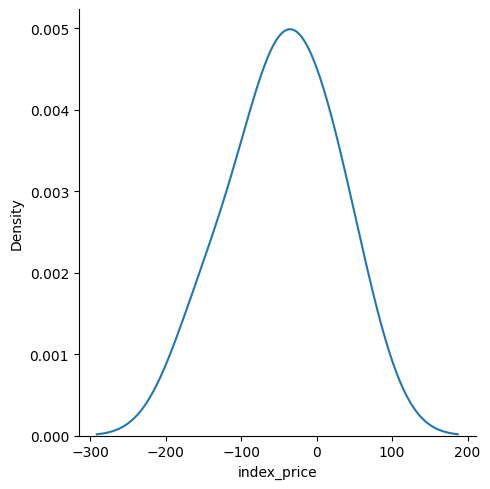

In [65]:
sns.displot(residuals,kind = "kde")

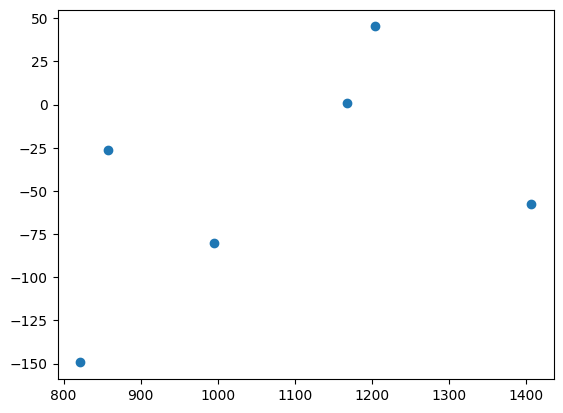

In [66]:
plt.scatter(y_pred,residuals)

In [67]:
model3 = sm.OLS(y_train,x_train).fit()

In [68]:
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 16 May 2025   Prob (F-statistic):                       0.754
Time:                        14:00:24   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\rauna\codes\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Polynomial Regression

In [69]:
x = 6*np.random.rand(100,1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)

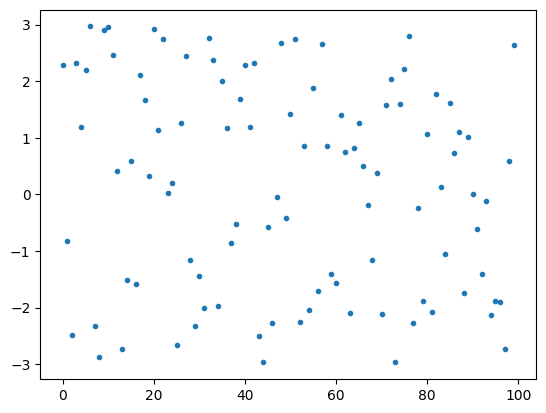

In [70]:
plt.plot(x,".")

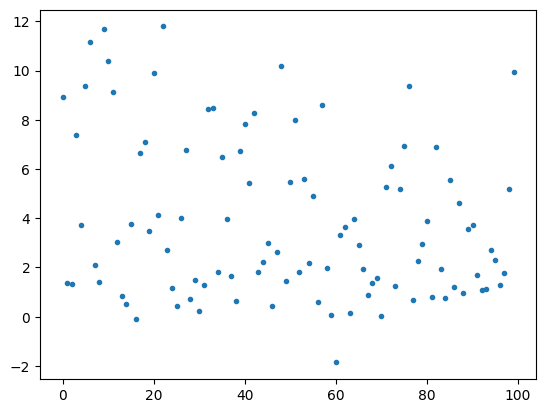

In [71]:
plt.plot(y,".")

In [72]:
x

array([[ 2.28619566e+00],
       [-8.27436564e-01],
       [-2.48340456e+00],
       [ 2.31438970e+00],
       [ 1.18324038e+00],
       [ 2.20038442e+00],
       [ 2.96687504e+00],
       [-2.32609540e+00],
       [-2.87860332e+00],
       [ 2.90709457e+00],
       [ 2.95418248e+00],
       [ 2.46367567e+00],
       [ 4.20297479e-01],
       [-2.72187836e+00],
       [-1.51365523e+00],
       [ 5.89816910e-01],
       [-1.58224994e+00],
       [ 2.10938795e+00],
       [ 1.66955631e+00],
       [ 3.21834577e-01],
       [ 2.92010330e+00],
       [ 1.14694673e+00],
       [ 2.75086342e+00],
       [ 2.95791042e-02],
       [ 2.04520351e-01],
       [-2.66204653e+00],
       [ 1.25885285e+00],
       [ 2.45274754e+00],
       [-1.15821013e+00],
       [-2.31818193e+00],
       [-1.44610326e+00],
       [-1.99952725e+00],
       [ 2.77163750e+00],
       [ 2.36994092e+00],
       [-1.97887282e+00],
       [ 2.00061205e+00],
       [ 1.16859981e+00],
       [-8.59657012e-01],
       [-5.3

In [73]:
y

array([[ 8.90766699],
       [ 1.370323  ],
       [ 1.34751301],
       [ 7.36871346],
       [ 3.72725494],
       [ 9.38867748],
       [11.14886871],
       [ 2.09056083],
       [ 1.39355595],
       [11.67699585],
       [10.38328614],
       [ 9.14179776],
       [ 3.01515707],
       [ 0.82409423],
       [ 0.52704106],
       [ 3.78087772],
       [-0.0906733 ],
       [ 6.65285246],
       [ 7.09122044],
       [ 3.46270164],
       [ 9.90026481],
       [ 4.12921816],
       [11.79001065],
       [ 2.69508374],
       [ 1.16413319],
       [ 0.43242993],
       [ 4.00947232],
       [ 6.77265748],
       [ 0.73628154],
       [ 1.49290201],
       [ 0.2405343 ],
       [ 1.30693924],
       [ 8.42381399],
       [ 8.47352639],
       [ 1.81089421],
       [ 6.50316527],
       [ 3.95973806],
       [ 1.67066895],
       [ 0.65616356],
       [ 6.74709527],
       [ 7.8313376 ],
       [ 5.44925987],
       [ 8.2864302 ],
       [ 1.82172058],
       [ 2.22993956],
       [ 2

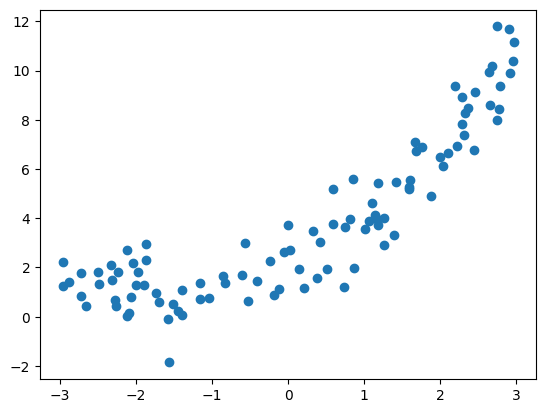

In [74]:
plt.scatter(x,y)

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
regression.fit(x_train,y_train)

LinearRegression()

In [77]:
y_pred = regression.predict(x_test)
y_pred

array([[ 3.68401104],
       [ 4.73157302],
       [ 0.36624086],
       [ 2.64491994],
       [-0.88058056],
       [ 5.95655323],
       [ 7.52350405],
       [ 5.04696424],
       [ 7.82228692],
       [ 6.84066218],
       [ 5.93449393],
       [ 1.35594768],
       [-0.86979   ],
       [ 6.96372811],
       [ 3.48274008],
       [ 5.21983948],
       [ 7.5842289 ],
       [ 0.13321689],
       [ 4.09867419],
       [ 0.54267612]])

In [78]:
r2 = r2_score(y_test,y_pred)
r2

0.753908780964555

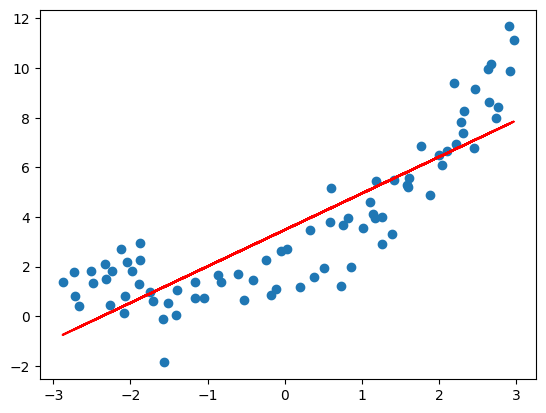

In [79]:
plt.plot(x_train,regression.predict(x_train),"r")
plt.scatter(x_train,y_train )

In [80]:
#applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures


In [81]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [82]:
x_train_poly

array([[ 1.00000000e+00,  1.88016319e+00,  3.53501364e+00],
       [ 1.00000000e+00, -1.74352861e+00,  3.03989202e+00],
       [ 1.00000000e+00,  1.25885285e+00,  1.58471049e+00],
       [ 1.00000000e+00,  2.32565158e+00,  5.40865527e+00],
       [ 1.00000000e+00,  3.75481173e-01,  1.40986111e-01],
       [ 1.00000000e+00,  5.89816910e-01,  3.47883987e-01],
       [ 1.00000000e+00,  2.28878557e+00,  5.23853938e+00],
       [ 1.00000000e+00, -1.89398617e+00,  3.58718363e+00],
       [ 1.00000000e+00,  2.90709457e+00,  8.45119881e+00],
       [ 1.00000000e+00,  2.03808130e+00,  4.15377540e+00],
       [ 1.00000000e+00,  2.46367567e+00,  6.06969780e+00],
       [ 1.00000000e+00, -5.06871456e-02,  2.56918673e-03],
       [ 1.00000000e+00,  1.60692997e+00,  2.58222394e+00],
       [ 1.00000000e+00, -1.15821013e+00,  1.34145070e+00],
       [ 1.00000000e+00, -1.17541950e-01,  1.38161101e-02],
       [ 1.00000000e+00,  2.20038442e+00,  4.84169158e+00],
       [ 1.00000000e+00,  5.08277355e-01

In [83]:
regression.fit(x_train_poly,y_train)

LinearRegression()

In [84]:
y_poly_pred = regression.predict(x_test_poly)
y_poly_pred

array([[ 2.05538598],
       [ 3.40330986],
       [ 1.12791488],
       [ 1.21861847],
       [ 2.09246243],
       [ 5.62181051],
       [ 9.469004  ],
       [ 3.90831049],
       [10.33119454],
       [ 7.65319534],
       [ 5.57573765],
       [ 0.87297736],
       [ 2.08103754],
       [ 7.96455716],
       [ 1.85439851],
       [ 4.20459131],
       [ 9.6409009 ],
       [ 1.25367788],
       [ 2.52839266],
       [ 1.04936086]])

In [85]:
r2 = r2_score(y_test,y_poly_pred)
r2

0.8981309895084704

In [86]:
print(regression.intercept_)

[1.85277631]


In [87]:
print(regression.coef_)

[[0.         1.39806008 0.49824647]]


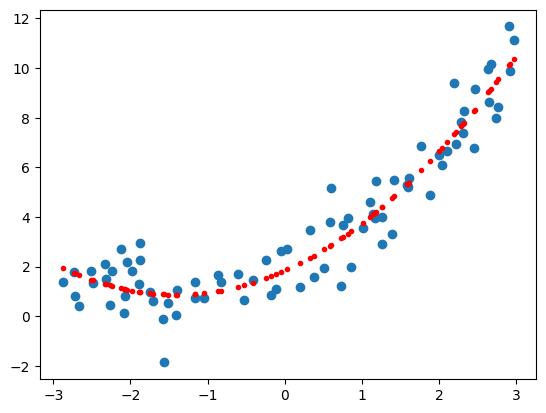

In [88]:
plt.plot(x_train,regression.predict(x_train_poly),"r.")
plt.scatter(x_train,y_train)


In [89]:
poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [90]:
regression.fit(x_train_poly,y_train)
y_poly_pred = regression.predict(x_test_poly)
r2 = r2_score(y_test,y_poly_pred)
print(r2)

0.8977223240205223


Testing it with new dataset

In [91]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new

array([[-3.        ],
       [-2.96984925],
       [-2.93969849],
       [-2.90954774],
       [-2.87939698],
       [-2.84924623],
       [-2.81909548],
       [-2.78894472],
       [-2.75879397],
       [-2.72864322],
       [-2.69849246],
       [-2.66834171],
       [-2.63819095],
       [-2.6080402 ],
       [-2.57788945],
       [-2.54773869],
       [-2.51758794],
       [-2.48743719],
       [-2.45728643],
       [-2.42713568],
       [-2.39698492],
       [-2.36683417],
       [-2.33668342],
       [-2.30653266],
       [-2.27638191],
       [-2.24623116],
       [-2.2160804 ],
       [-2.18592965],
       [-2.15577889],
       [-2.12562814],
       [-2.09547739],
       [-2.06532663],
       [-2.03517588],
       [-2.00502513],
       [-1.97487437],
       [-1.94472362],
       [-1.91457286],
       [-1.88442211],
       [-1.85427136],
       [-1.8241206 ],
       [-1.79396985],
       [-1.7638191 ],
       [-1.73366834],
       [-1.70351759],
       [-1.67336683],
       [-1

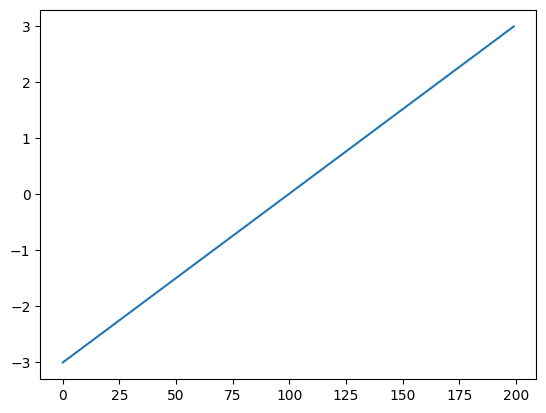

In [92]:
plt.plot(x_new)

In [93]:
x_new_test_poly = poly.transform(x_new)
x_new_test_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

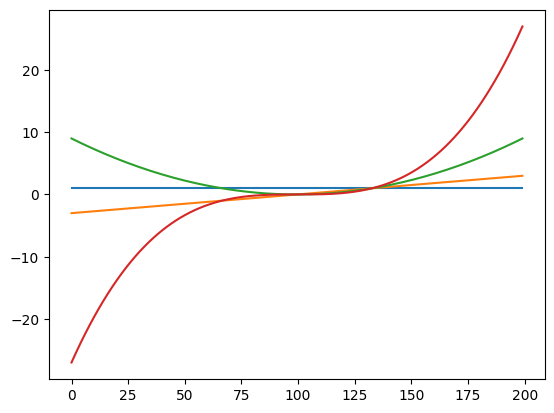

In [94]:
plt.plot(x_new_test_poly)

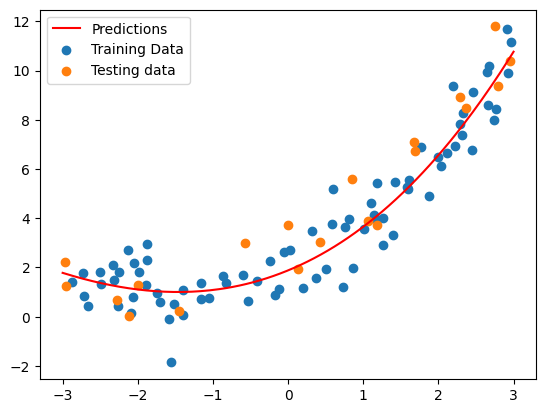

In [95]:
y_new_poly = regression.predict(x_new_test_poly)
plt.plot(x_new,y_new_poly,"r",label = "Predictions")
plt.scatter(x_train,y_train,label = "Training Data")
plt.scatter(x_test,y_test,label = "Testing data")
plt.legend()
plt.show()

# Testing Shap

In [ ]:
#pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [98]:
import shap
import xgboost

c:\Users\rauna\codes\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [99]:
x,y = shap.datasets.california()

In [100]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [101]:
model = xgboost.XGBRFRegressor().fit(x,y)

In [102]:
explainer = shap.Explainer(model)

In [103]:
shap_values = explainer(x)

In [104]:
print(shap_values)

.values =
array([[ 2.1422691 ,  0.18453002,  0.21276216, ...,  0.02643504,
        -0.02814339,  0.05835532],
       [ 1.7939894 , -0.05509826, -0.05712468, ...,  0.3332619 ,
         0.01385837,  0.07156795],
       [ 1.4856    ,  0.1766362 ,  0.14868857, ..., -0.04094912,
        -0.1596904 ,  0.06002691],
       ...,
       [-0.79572964, -0.04848135, -0.09317777, ...,  0.0992626 ,
        -0.33628893,  0.02154716],
       [-0.80099857, -0.04876031, -0.08573645, ...,  0.23583715,
        -0.44582263,  0.02383108],
       [-0.676902  , -0.0419959 , -0.12663478, ..., -0.01979152,
        -0.2581338 ,  0.01413555]], dtype=float32)

.base_values =
array([2.069203, 2.069203, 2.069203, ..., 2.069203, 2.069203, 2.069203],
      dtype=float32)

.data =
array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574  

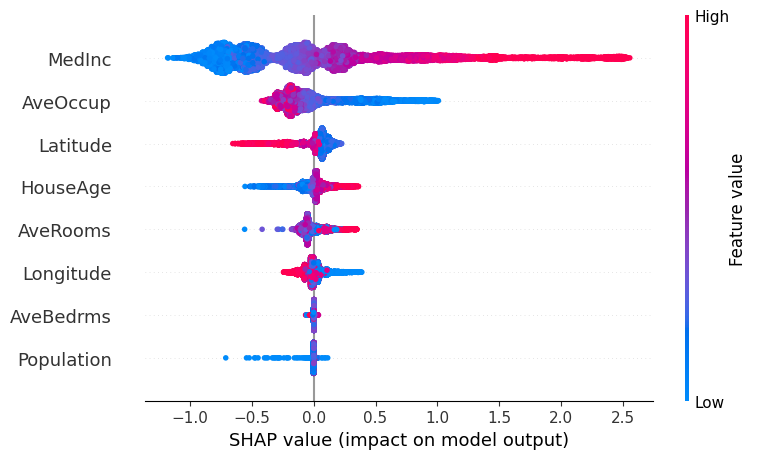

In [105]:
shap.summary_plot(shap_values,x)

# Regression pipeline

In [106]:
from sklearn.pipeline import Pipeline

In [107]:
def poly_reg(degree):
    x_new = np.linspace(-3,3, 200).reshape(200,1)
    poly_feat = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_reg = Pipeline([
        ("Poly_features", poly_feat),
        ("Linear_reg", lin_reg)
    ])
    poly_reg.fit(x_train,y_train)
    y_pred_new = poly_reg.predict(x_new)

    plt.plot(x_new,y_pred_new,"r", label = "Degree" + str(degree))
    plt.plot(x_train,y_train,"b.")
    plt.plot(x_test, y_test,"g.")
    plt.legend()
    plt.axis([-4, 4, 0, 10])
    plt.show()

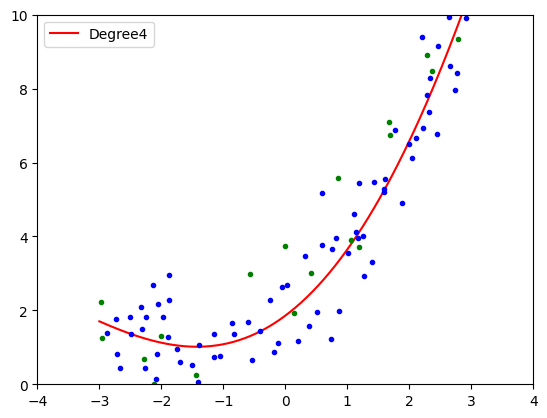

In [195]:
poly_reg(4)

# Simple linear Reg using normal equation

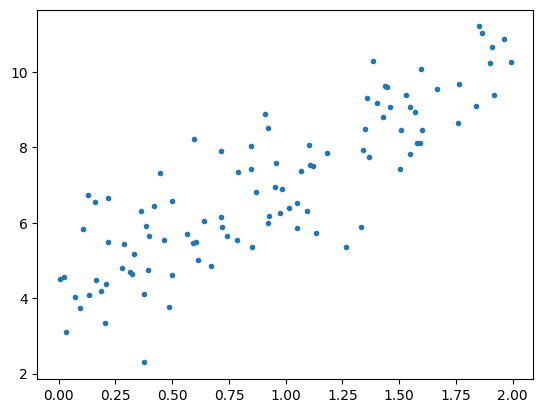

In [ ]:
x = 2* np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)


In [111]:
xb = np.c_[np.ones((100,1)), x]
xb

array([[1.        , 0.92216121],
       [1.        , 0.20752662],
       [1.        , 1.8645976 ],
       [1.        , 1.90671542],
       [1.        , 1.59866755],
       [1.        , 0.85141006],
       [1.        , 0.91051224],
       [1.        , 0.32387929],
       [1.        , 1.13289899],
       [1.        , 0.50128015],
       [1.        , 1.56914417],
       [1.        , 1.75942536],
       [1.        , 1.66678351],
       [1.        , 0.28034857],
       [1.        , 0.56392225],
       [1.        , 0.44648193],
       [1.        , 0.18723044],
       [1.        , 0.97427933],
       [1.        , 1.3514714 ],
       [1.        , 0.61342083],
       [1.        , 1.85048409],
       [1.        , 0.03363755],
       [1.        , 1.38321647],
       [1.        , 1.1040285 ],
       [1.        , 1.33215448],
       [1.        , 0.37436912],
       [1.        , 1.09188782],
       [1.        , 0.86787682],
       [1.        , 1.96340297],
       [1.        , 0.41866767],
       [1.

In [112]:
thetha_best = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

In [113]:
x_new = np.array([[0],[2]])
x_new

array([[0],
       [2]])

In [115]:
x_new_b = np.c_[np.ones((2,1)), x_new]
y_pred = x_new_b.dot(thetha_best)
y_pred

array([[ 4.10893338],
       [10.19960026]])

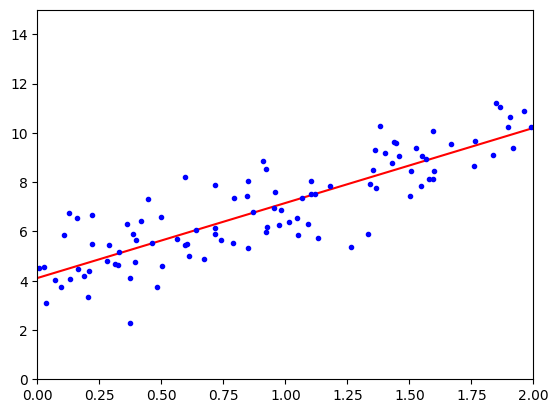

In [116]:
plt.plot(x_new, y_pred,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

# Batch Gradient Descent
Here we initialize the thetha values as 0, we predict with this thetha for all training data and calculate the error and calculate the cost function and update the parameter

* At the start, you don’t have the exact θ because the model hasn’t learned yet.

* So, you initialize θ with some starting values (usually zeros or small random numbers).

* Using this initial θ, you compute predictions, even though they’re not accurate yet.

* Then, you use the errors from these predictions to update θ via gradient descent.

* You repeat this process, gradually improving θ so predictions get better and better.



In [156]:
eta = 0.1
n_iteration = 1000
m =100

thetha_history = []

thetha = [[0],[0]]

for i in range(n_iteration):
    gradient = 1/m * xb.T.dot(xb.dot(thetha) - y)
    thetha = thetha - eta*gradient
    thetha_history.append(thetha.copy())
print(thetha)

[[4.10893331]
 [3.04533351]]


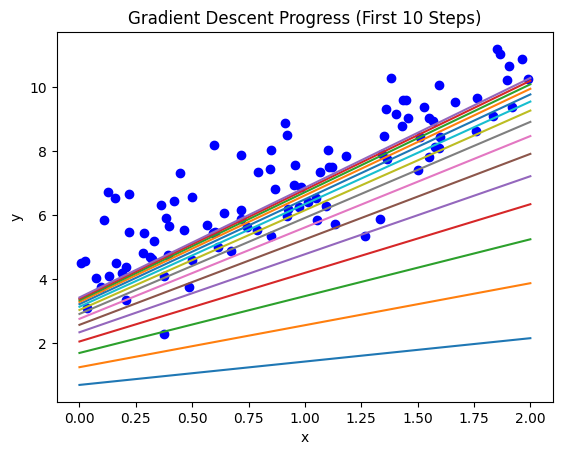

In [157]:
# Plot data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot regression lines for each step
x_vals = np.array([[0], [2]])
for i, th in enumerate(thetha_history[:15]):
    y_vals = th[0] + th[1] * x_vals
    plt.plot(x_vals, y_vals, label=f'Step {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Progress (First 10 Steps)')
plt.show()

For eta = 0.02

[[4.02533931]
 [3.12190256]]


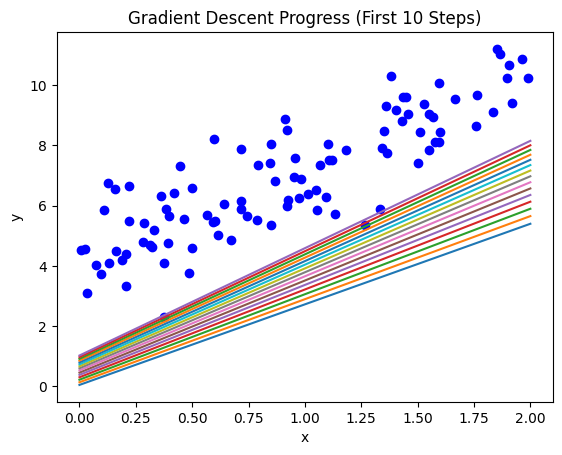

In [158]:
eta = 0.02
n_iteration = 1000
m =100

thetha_history = []

thetha = np.random.randn(2,1)

for i in range(n_iteration):
    gradient = 1/m * xb.T.dot(xb.dot(thetha) - y)
    thetha = thetha - eta*gradient
    thetha_history.append(thetha.copy())
print(thetha)

# Plot data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot regression lines for each step
x_vals = np.array([[0], [2]])
for i, th in enumerate(thetha_history[:15]):
    y_vals = th[0] + th[1] * x_vals
    plt.plot(x_vals, y_vals, label=f'Step {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Progress (First 10 Steps)')
plt.show()

For eta 0.5

[[4.10893338]
 [3.04533344]]


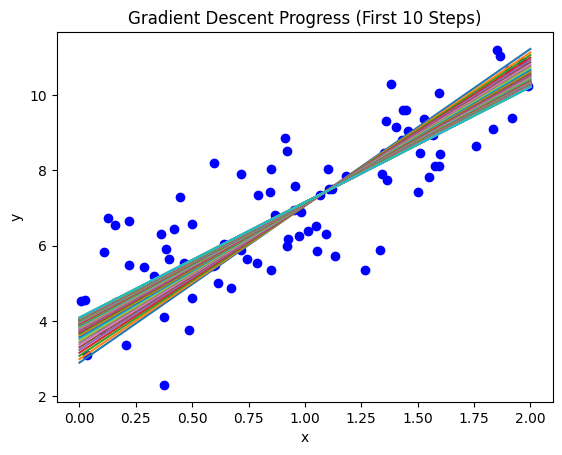

In [ ]:
eta = 0.5
n_iteration = 1000
m =100

thetha_history = []

thetha = np.random.randn(2,1)

for i in range(n_iteration):
    gradient = 1/m * xb.T.dot(xb.dot(thetha) - y)
    thetha = thetha - eta*gradient
    thetha_history.append(thetha.copy())
print(thetha)

# Plot data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot regression lines for each step
x_vals = np.array([[0], [2]])
for i, th in enumerate(thetha_history[:50]):
    y_vals = th[0] + th[1] * x_vals
    plt.plot(x_vals, y_vals, label=f'Step {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Progress (First 10 Steps)')
plt.show()

Epoch 0, Cost: 0.503844183967183, gradient : [[-3.72235576e-14]
 [ 2.96584979e-14]]
Epoch 100, Cost: 0.48391186424090943, gradient : [[-0.00747293]
 [ 0.00667698]]
Epoch 200, Cost: 0.48364525477330944, gradient : [[-0.00125803]
 [ 0.00112403]]
Epoch 300, Cost: 0.4836376990901249, gradient : [[-0.00021178]
 [ 0.00018922]]
Epoch 400, Cost: 0.48363748496288894, gradient : [[-3.56523344e-05]
 [ 3.18549560e-05]]
Epoch 500, Cost: 0.4836374788945464, gradient : [[-6.00187653e-06]
 [ 5.36260854e-06]]
Epoch 600, Cost: 0.48363747872257007, gradient : [[-1.01038326e-06]
 [ 9.02765973e-07]]
Epoch 700, Cost: 0.4836374787176964, gradient : [[-1.70092525e-07]
 [ 1.51975740e-07]]
Epoch 800, Cost: 0.48363747871755836, gradient : [[-2.86341521e-08]
 [ 2.55842885e-08]]
Epoch 900, Cost: 0.48363747871755436, gradient : [[-4.82040390e-09]
 [ 4.30697568e-09]]


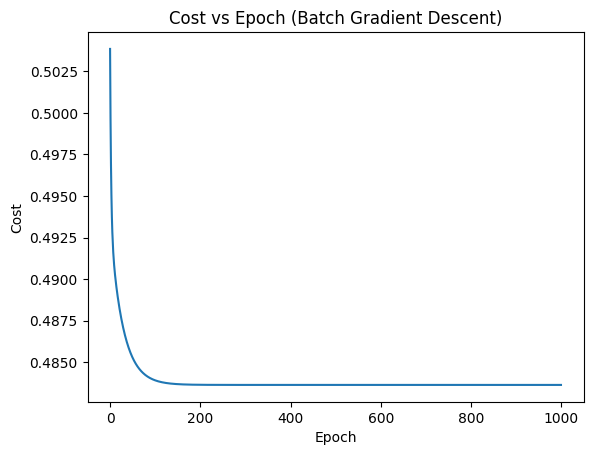

In [181]:
x = 2* np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)
xb = np.c_[np.ones((100,1)), x]

cost_history = []
eta = 0.1
for i in range(n_iteration):
    predictions = xb.dot(thetha)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Epoch {i}, Cost: {cost}, gradient : {gradient}")

    # Gradient descent step
    gradient = 1/m * xb.T.dot(xb.dot(thetha) - y)
    thetha = thetha - eta * gradient

# Plotting cost vs epoch
plt.plot(range(n_iteration), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch (Batch Gradient Descent)')
plt.show()